In [2]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
print('Imports complete, GET Some!')

Imports complete, GET Some!


In [3]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

#################
codeup students start producing a scratch off lottery ticket
called "Golden Codys". The odds of winning a prize must be 
advertised to the state, and since we are manufacturing the 
tickets, we know exactly how many winners and losers there are.

+Theory: Our population is the 1000 tickets we have manufactured

+Implementation: Create a boolean pandas Series

++ we model win with true and lose with false
++ because of this, we can take the mean of a series to measure the likelihood of winning

The actual probability of winning is 0.25


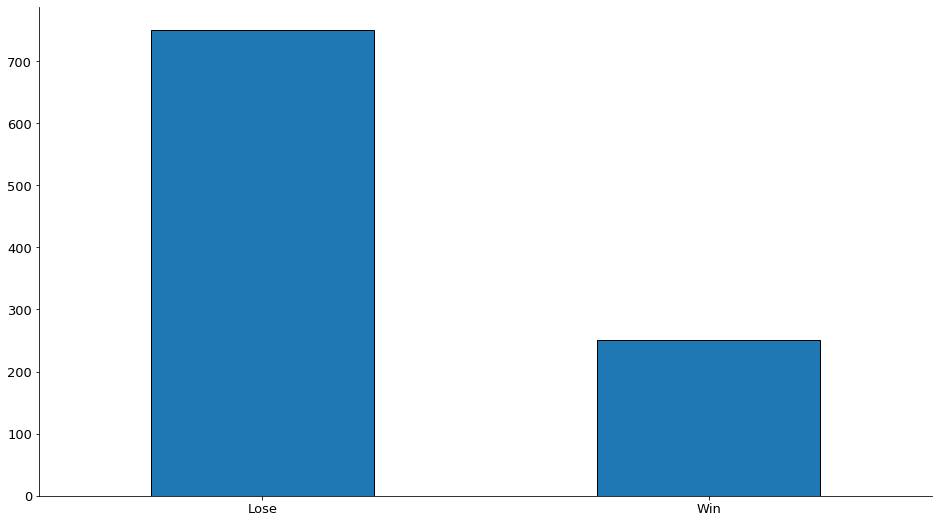

In [4]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()
plt.xticks(rotation=0)
print('The actual probability of winning is %.2f' % tickets.mean())

+Scenario: Each student in a classroom is given a Golden Cody scratch off at random
+Theory

+We take a random sample and calculate the win rate, we won't expect to see exactly
25% even though we know that is what the overall rate is.

+Examples of biased samples:

++ non-response: people that don't respond are a diff population
++ undercoverage: some groups aren't well represented
++ voluntary: people volunteer for surveys
++ leading questions
++ social desirability

+Implementation: Use the .sample method on our series to randomly choose 25 tickets, 
representing 25 students in a classroom. Use .mean to calculate what percentage of 
the values are True, or are winning tickets.

In [5]:
n = 25
tickets.sample(n).mean()

0.12

+Scenario: each student in 4 different cohorts is given a Golden Codys scratch off 
ticket, we want to calculate the win rate for each classroom.

+Theory: it is unlikely any classroom will have exactly a 25% winrate, instead we
will see slightly different numbers for each classroom.

+Implementation: loop through a range of 5 to get a sample and calculate the 
winrate 5 times. Each of the 5 numbers produced represents the calculated winrate 
for one classroom of 25 students.

In [6]:
[tickets.sample(n).mean() for i in range(5)]

[0.28, 0.28, 0.08, 0.24, 0.36]

Theory

+The winrates we see aren't ever exactly 25%, but we would expect the rate to be 
closer to 25% than further away. That is, it is more likely that a classroom 
will come up with a win rate of 24% than a winrate of 10%.

+If we were to repeat this experiment a whole bunch of times, say 10,000, we 
would find that the calculated winrates are, in fact, normally distributed.

+That is, we would expect the calculated average winrate for a classroom to follow 
a normal distribution, even though the underlying random process is not based 
on a normal distribution

+Implementation: To visualize this, we'll create a series full of calculated 
winrates for 10,000 classrooms, each classroom made up of 25 students. That is, 
we will simulate 10,000 classrooms of 25 students getting Golden Codys and 
calculate the average winrate for each of the 10,000 classrooms.

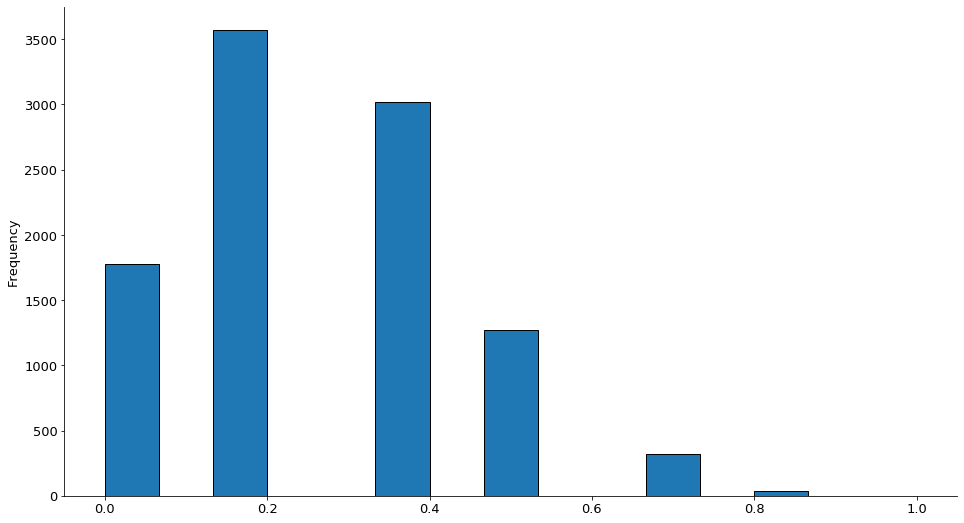

In [22]:
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
calculated_winrates.plot.hist(bins=15)

^^^Theory^^^

+The above visual represents the sampling distribution for the 
winrate of Golden Codys, based on a class of 25.

+The Central Limit Theorm says that sampling distribution will 
be normally distributed even if the underlying random variable isn't.

####### Mini Exercise CLT

+Calculate, theoretically (in your head is fine), the expected 
value for the average of 6 dice rolls.

+Write the code necessary to simulate taking the average of 6 
dice rolls 10,000 times. Store each of the 10,000 averages in a list.

+Plot the distribution of the calculated averages. What do 
you notice about the shape of the distribution of calculated 
averages? What kind of distribution is the underlying random 
variable (i.e. one dice roll?)

In [14]:
dice = np.random.choice([1,2,3,4,5,6], size = 10_000)
dice.mean()

3.5056

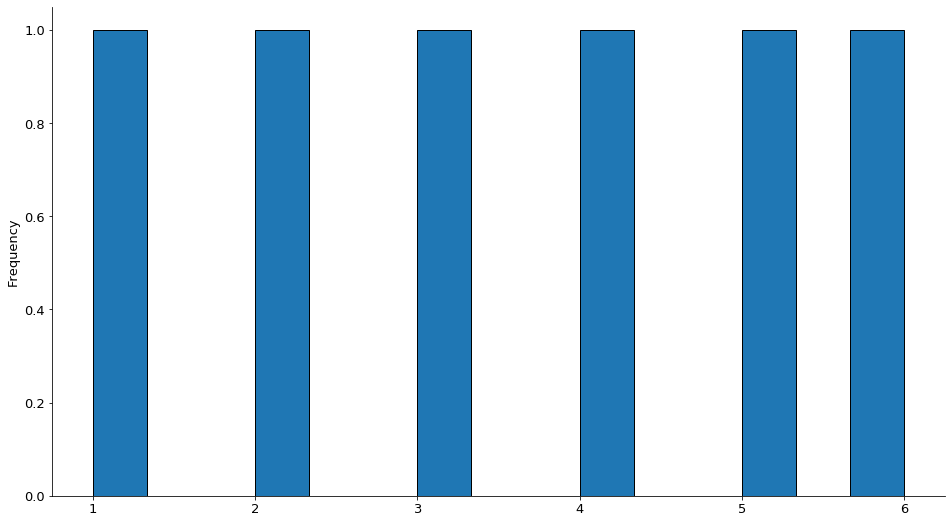

In [23]:
dices = pd.Series([1,2,3,4,5,6])

n = 6
dices.sample(n).mean()
dices.plot.hist(bins=15)